![](http://www.neuraldesigner.com/images/activity-diagram-churn-prevention.svg)

### **Table of Content**:

1. Introduction
2. Loading Libraries and Data
3. Understanding the Data
4. Data Manipulation
5. Exploratory Data Analysis & Visualization
6. Feature Engineering
7. Machine Learning Model Evaluation and Prediction
8. Model Comparison and Selection
9. Conclusion & Business Recommendations

<div style="background: linear-gradient(to right, #fbbd61, #ff5f6d);
            padding: 20px; 
            font: bold 40px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Introduction
</div>

**What is Customer Churn?**

Customer churn is the rate at which customers discontinue their relationship with a company. In telecommunications, this rate is notably high—typically ranging from 15% to 25% annually—due to intense competition and customer preferences for better pricing, service quality, or additional features.

With millions of subscribers, telecom providers cannot realistically apply personalized retention strategies at scale. However, by leveraging data to identify high-risk customers, companies can target retention efforts more effectively. This strategic focus can reduce churn, strengthen customer loyalty, and enhance overall customer lifetime value (CLV).

Churn is more than a metric—it's a critical indicator of business health. Retaining an existing customer is far less expensive than acquiring a new one. Companies that minimize churn benefit from lower acquisition costs, stronger brand loyalty, and higher profitability.

Effective churn reduction depends on early detection. This requires a holistic view of customer behavior across in-store activity, product usage, customer service interactions, digital engagement, and social media trends. By acting on these insights, telecom companies can preserve market share and create a foundation for sustainable growth.

**Objectives of This Analysis:**

This analysis explores customer churn within a telecom dataset and aims to answer the following questions:

* What percentage of customers have churned versus those who remain active?
* Are there identifiable churn patterns based on gender?
* Does churn vary by the type of service subscribed to?
* Which service types are the most profitable?
* What features and services contribute most significantly to profitability?
* Can we build a predictive model to identify at-risk customers?

<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 30px Arial; 
           color: #31708f; 
           border: 2px solid #bce8f1; 
           border-radius: 8px;">   
Loading Libraries and Data
</h3>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_curve, auc,
                             precision_recall_curve, average_precision_score)

# Class Imbalance Handling
from sklearn.utils.class_weight import compute_class_weight

# Set display options
pd.set_option('display.max_columns', 60)
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [2]:
# Importing Data
# Note: Update path as needed for your environment
df = pd.read_csv('/kaggle/input/telco-customer-churn-11-1-3/telco.csv')
print(f"Dataset Shape: {df.shape}")
print(f"Total Customers: {df.shape[0]:,}")
df.head()

Dataset Shape: (7043, 50)
Total Customers: 7,043


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 30px Arial; 
           color: #31708f; 
           border: 2px solid #bce8f1; 
           border-radius: 8px;">   
Understanding the Data
</h3>

In [3]:
# Basic data information
print("=" * 60)
print("DATA OVERVIEW")
print("=" * 60)
print(f"\nRows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df.dtypes.value_counts())

DATA OVERVIEW

Rows: 7,043
Columns: 50

Memory Usage: 13.47 MB

DATA TYPES
object     31
int64      11
float64     8
Name: count, dtype: int64


In [4]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with Missing Values:")
    print(missing_df)
else:
    print("✅ No missing values found!")

Columns with Missing Values:
                Missing Count  Missing %
Churn Category           5174      73.46
Churn Reason             5174      73.46
Offer                    3877      55.05
Internet Type            1526      21.67


In [5]:
# Statistical summary of numeric columns
df.describe().round(2)

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score,CLTV
count,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00,7043.00
mean,46.51,0.47,93486.07,36.20,-119.76,22139.60,1.95,32.39,22.96,20.52,64.76,2280.38,1.96,6.86,749.10,3034.38,3.24,58.51,4400.30
std,16.75,0.96,1856.77,2.47,2.15,21152.39,3.00,24.54,15.45,20.42,30.09,2266.22,7.90,25.10,846.66,2865.20,1.20,21.17,1183.06
min,19.00,0.00,90001.00,32.56,-124.30,11.00,0.00,1.00,0.00,0.00,18.25,18.80,0.00,0.00,0.00,21.36,1.00,5.00,2003.00
25%,32.00,0.00,92101.00,33.99,-121.79,2344.00,0.00,9.00,9.21,3.00,35.50,400.15,0.00,0.00,70.54,605.61,3.00,40.00,3469.00
50%,46.00,0.00,93518.00,36.21,-119.60,17554.00,0.00,29.00,22.89,17.00,70.35,1394.55,0.00,0.00,401.44,2108.64,3.00,61.00,4527.00
75%,60.00,0.00,95329.00,38.16,-117.97,36125.00,3.00,55.00,36.39,27.00,89.85,3786.60,0.00,0.00,1191.10,4801.15,4.00,75.50,5380.50
max,80.00,9.00,96150.00,41.96,-114.19,105285.00,11.00,72.00,49.99,85.00,118.75,8684.80,49.79,150.00,3564.72,11979.34,5.00,96.00,6500.00


<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 30px Arial; 
           color: #31708f; 
           border: 2px solid #bce8f1; 
           border-radius: 8px;">   
Data Manipulation
</h3>

In [6]:
# Create a working copy
df_clean = df.copy()

# 1. Create Tenure in Years category
df_clean['Tenure in Years'] = pd.cut(
    df_clean['Tenure in Months'], 
    bins=range(0, 73, 12), 
    labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5-6 Years']
)

# 2. Fill missing values for churn-related columns
fill_values = {
    'Churn Category': 'Not Churned',
    'Churn Reason': 'Not Churned',
    'Offer': 'None',
    'Internet Type': 'None'
}
df_clean.fillna(value=fill_values, inplace=True)

# 3. Convert Yes/No columns to boolean (using recommended method)
yes_no_columns = [
    'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Referred a Friend',
    'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
    'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Paperless Billing'
]

for col in yes_no_columns:
    df_clean[col] = df_clean[col].map({'Yes': True, 'No': False})

# 4. Create aggregate feature: Total number of add-on services
addon_services = [
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music'
]
df_clean['Total Addon Services'] = df_clean[addon_services].sum(axis=1)

# 5. Create Monthly Charge Tier
df_clean['Charge Tier'] = pd.cut(
    df_clean['Monthly Charge'],
    bins=[0, 40, 70, 120],
    labels=['Low', 'Medium', 'High']
)

print(f"✅ Data manipulation complete!")
print(f"Final shape: {df_clean.shape}")
df_clean.head()

✅ Data manipulation complete!
Final shape: (7043, 53)


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason,Tenure in Years,Total Addon Services,Charge Tier
0,8779-QRDMV,Male,78,False,True,False,False,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,False,0,1,None,False,0.00,False,Yes,DSL,8,False,False,True,False,False,True,False,False,Month-to-Month,True,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data,0-1 Year,2,Low
1,7495-OOKFY,Female,74,False,True,True,True,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,True,1,8,Offer E,True,48.85,True,Yes,Fiber Optic,17,False,True,False,False,False,False,False,True,Month-to-Month,True,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer,0-1 Year,1,High
2,1658-BYGOY,Male,71,False,True,False,True,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,False,0,18,Offer D,True,11.33,True,Yes,Fiber Optic,52,False,False,False,False,True,True,True,True,Month-to-Month,True,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer,1-2 Years,3,High
3,4598-XLKNJ,Female,78,False,True,True,True,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,True,1,25,Offer C,True,19.76,False,Yes,Fiber Optic,12,False,True,True,False,True,True,False,True,Month-to-Month,True,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services,2-3 Years,4,High
4,4846-WHAFZ,Female,80,False,True,True,True,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,True,1,37,Offer C,True,6.33,True,Yes,Fiber Optic,14,False,False,False,False,False,False,False,True,Month-to-Month,True,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges,3-4 Years,0,High


<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 30px Arial; 
           color: #31708f; 
           border: 2px solid #bce8f1; 
           border-radius: 8px;">   
Exploratory Data Analysis & Visualization
</h3>

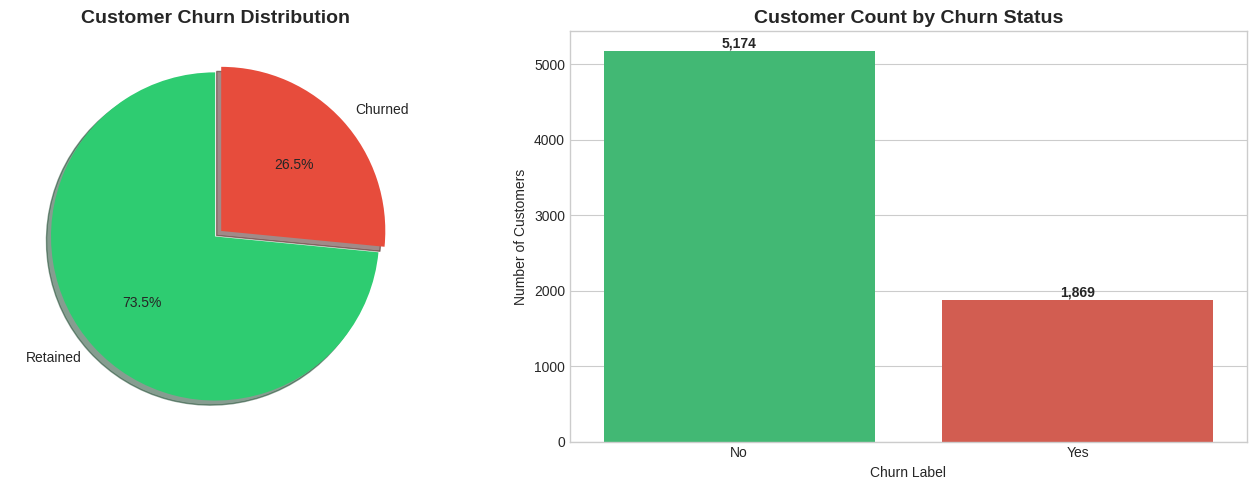


📊 CHURN STATISTICS:
   • Total Customers: 7,043
   • Churned: 1,869 (26.5%)
   • Retained: 5,174 (73.5%)


In [7]:
# Churn Distribution - Key Metric
churn_counts = df_clean['Churn Label'].value_counts()
churn_pct = df_clean['Churn Label'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Pie Chart
colors = ['#2ecc71', '#e74c3c']
axes[0].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
            colors=colors, explode=[0, 0.05], shadow=True, startangle=90)
axes[0].set_title('Customer Churn Distribution', fontsize=14, fontweight='bold')

# Bar Chart
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=colors, ax=axes[1])
axes[1].set_title('Customer Count by Churn Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Churn Label')
axes[1].set_ylabel('Number of Customers')
for i, v in enumerate(churn_counts.values):
    axes[1].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 CHURN STATISTICS:")
print(f"   • Total Customers: {len(df_clean):,}")
print(f"   • Churned: {churn_counts['Yes']:,} ({churn_pct['Yes']:.1f}%)")
print(f"   • Retained: {churn_counts['No']:,} ({churn_pct['No']:.1f}%)")

In [8]:
# Revenue Analysis
churned_df = df_clean[df_clean['Churn Label'] == 'Yes']
retained_df = df_clean[df_clean['Churn Label'] == 'No']

total_revenue = df_clean['Total Revenue'].sum()
churned_revenue = churned_df['Total Revenue'].sum()
retained_revenue = retained_df['Total Revenue'].sum()

print("💰 REVENUE ANALYSIS:")
print(f"   • Total Revenue: ${total_revenue:,.2f}")
print(f"   • Revenue from Churned Customers: ${churned_revenue:,.2f} ({churned_revenue/total_revenue*100:.1f}%)")
print(f"   • Revenue at Risk (Monthly): ${churned_df['Monthly Charge'].sum():,.2f}")

💰 REVENUE ANALYSIS:
   • Total Revenue: $21,371,131.69
   • Revenue from Churned Customers: $3,684,459.82 (17.2%)
   • Revenue at Risk (Monthly): $139,130.85


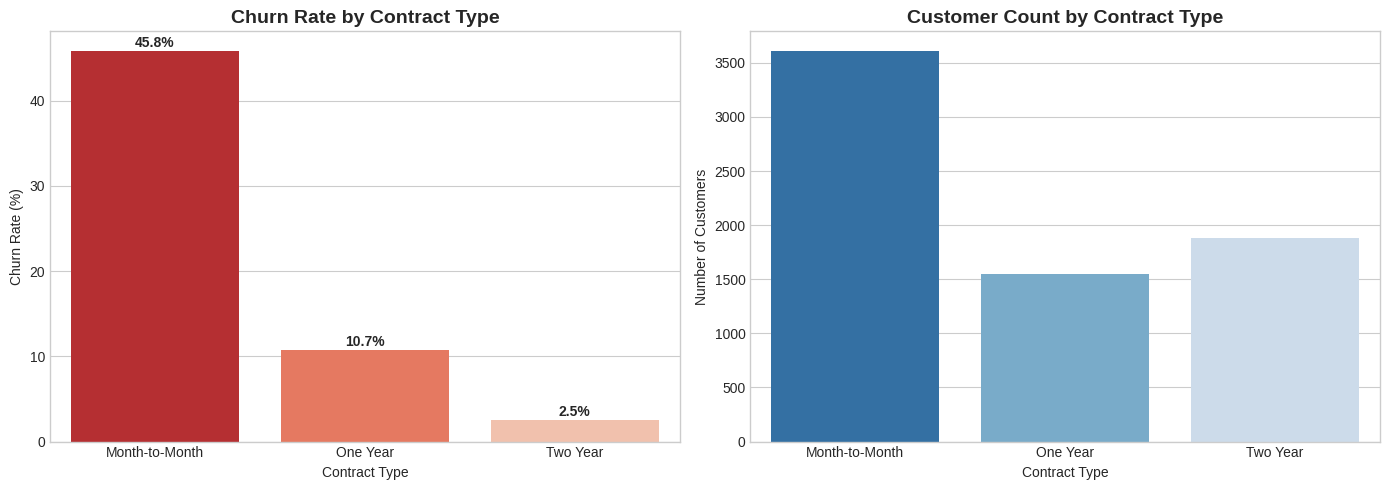


📋 KEY INSIGHT: Month-to-month contracts have significantly higher churn rates!


In [9]:
# Churn by Contract Type - Key Business Insight
contract_churn = df_clean.groupby('Contract').agg({
    'Churn Label': lambda x: (x == 'Yes').mean() * 100,
    'Customer ID': 'count'
}).rename(columns={'Churn Label': 'Churn Rate %', 'Customer ID': 'Customer Count'})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn Rate by Contract
contract_order = contract_churn.sort_values('Churn Rate %', ascending=False).index
sns.barplot(x=contract_order, y=contract_churn.loc[contract_order, 'Churn Rate %'], 
            palette='Reds_r', ax=axes[0])
axes[0].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Churn Rate (%)')
axes[0].set_xlabel('Contract Type')
for i, v in enumerate(contract_churn.loc[contract_order, 'Churn Rate %']):
    axes[0].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

# Customer Distribution by Contract
sns.barplot(x=contract_order, y=contract_churn.loc[contract_order, 'Customer Count'],
            palette='Blues_r', ax=axes[1])
axes[1].set_title('Customer Count by Contract Type', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlabel('Contract Type')

plt.tight_layout()
plt.show()

print("\n📋 KEY INSIGHT: Month-to-month contracts have significantly higher churn rates!")

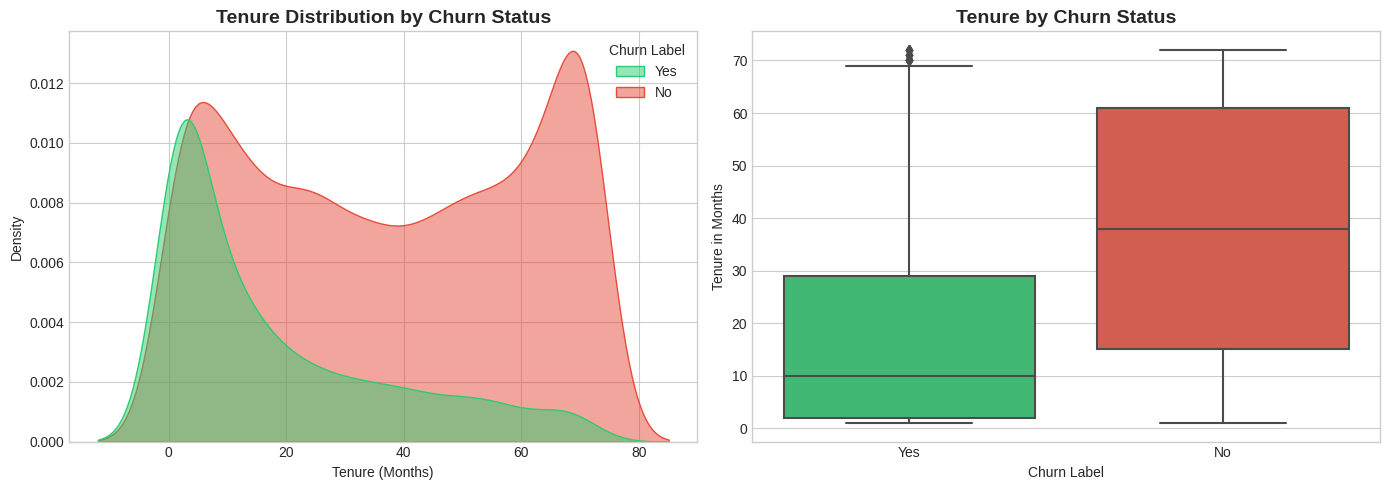


📋 TENURE INSIGHT:
   • Churned customers avg tenure: 18.0 months
   • Retained customers avg tenure: 37.6 months


In [10]:
# Tenure vs Churn Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# KDE Plot
sns.kdeplot(data=df_clean, x='Tenure in Months', hue='Churn Label', 
            fill=True, alpha=0.5, palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn Status', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure (Months)')

# Box Plot
sns.boxplot(data=df_clean, x='Churn Label', y='Tenure in Months', 
            palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Tenure by Churn Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📋 TENURE INSIGHT:")
print(f"   • Churned customers avg tenure: {churned_df['Tenure in Months'].mean():.1f} months")
print(f"   • Retained customers avg tenure: {retained_df['Tenure in Months'].mean():.1f} months")

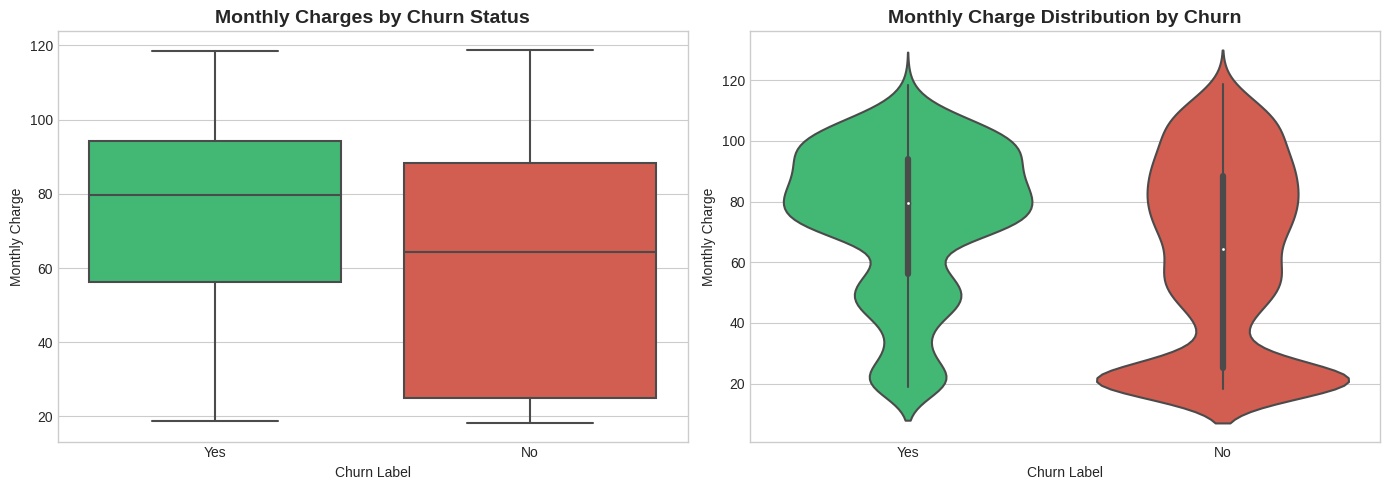


📋 CHARGE INSIGHT:
   • Churned customers avg charge: $74.44
   • Retained customers avg charge: $61.27


In [11]:
# Monthly Charges by Churn Status
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box Plot
sns.boxplot(data=df_clean, x='Churn Label', y='Monthly Charge', 
            palette=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Monthly Charges by Churn Status', fontsize=14, fontweight='bold')

# Violin Plot
sns.violinplot(data=df_clean, x='Churn Label', y='Monthly Charge',
               palette=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Monthly Charge Distribution by Churn', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📋 CHARGE INSIGHT:")
print(f"   • Churned customers avg charge: ${churned_df['Monthly Charge'].mean():.2f}")
print(f"   • Retained customers avg charge: ${retained_df['Monthly Charge'].mean():.2f}")

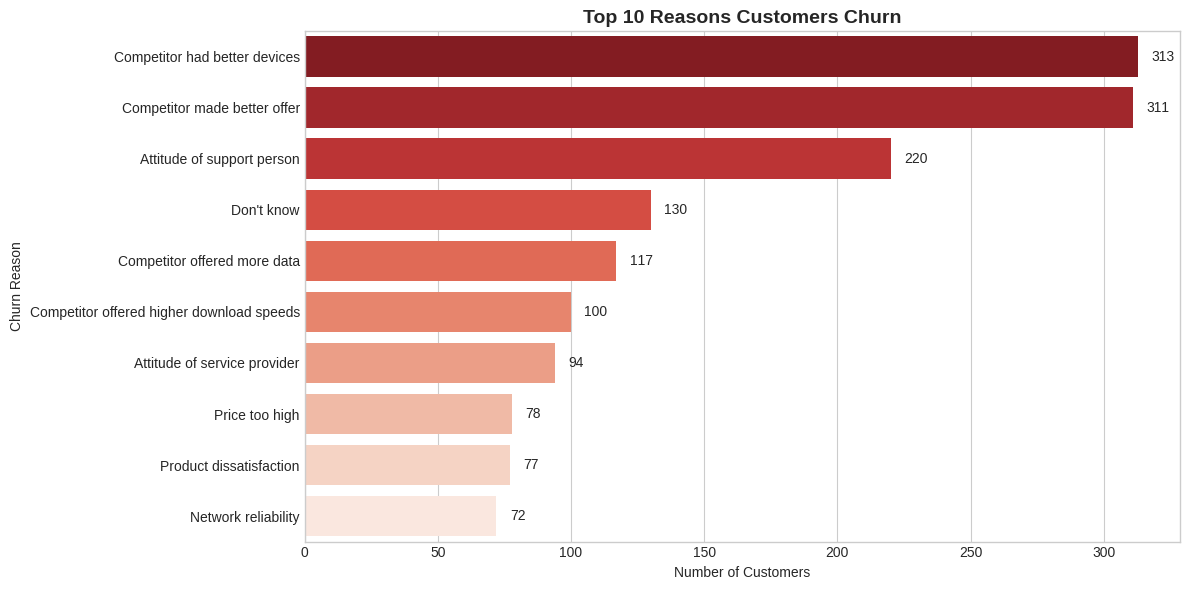

In [12]:
# Churn Reasons Analysis
churn_reasons = churned_df['Churn Reason'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=churn_reasons.values, y=churn_reasons.index, palette='Reds_r')
plt.title('Top 10 Reasons Customers Churn', fontsize=14, fontweight='bold')
plt.xlabel('Number of Customers')
plt.ylabel('Churn Reason')
for i, v in enumerate(churn_reasons.values):
    plt.text(v + 5, i, f'{v:,}', va='center')
plt.tight_layout()
plt.show()

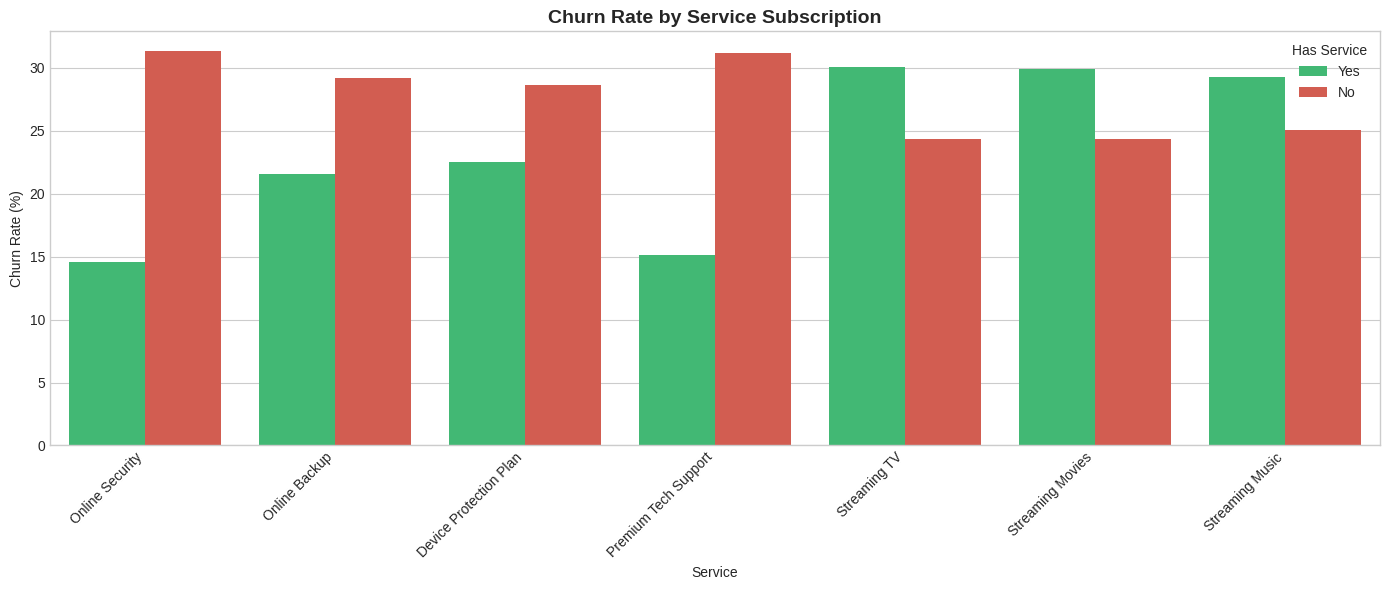


📋 KEY INSIGHT: Customers WITHOUT add-on services have higher churn rates!


In [13]:
# Service Adoption vs Churn
services = ['Online Security', 'Online Backup', 'Device Protection Plan',
            'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music']

service_churn = pd.DataFrame()
for service in services:
    churn_rate_yes = df_clean[df_clean[service] == True]['Churn Label'].apply(lambda x: x == 'Yes').mean() * 100
    churn_rate_no = df_clean[df_clean[service] == False]['Churn Label'].apply(lambda x: x == 'Yes').mean() * 100
    service_churn = pd.concat([service_churn, pd.DataFrame({
        'Service': [service, service],
        'Has Service': ['Yes', 'No'],
        'Churn Rate': [churn_rate_yes, churn_rate_no]
    })])

plt.figure(figsize=(14, 6))
sns.barplot(data=service_churn, x='Service', y='Churn Rate', hue='Has Service',
            palette=['#2ecc71', '#e74c3c'])
plt.title('Churn Rate by Service Subscription', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Service')
plt.tight_layout()
plt.show()

print("\n📋 KEY INSIGHT: Customers WITHOUT add-on services have higher churn rates!")

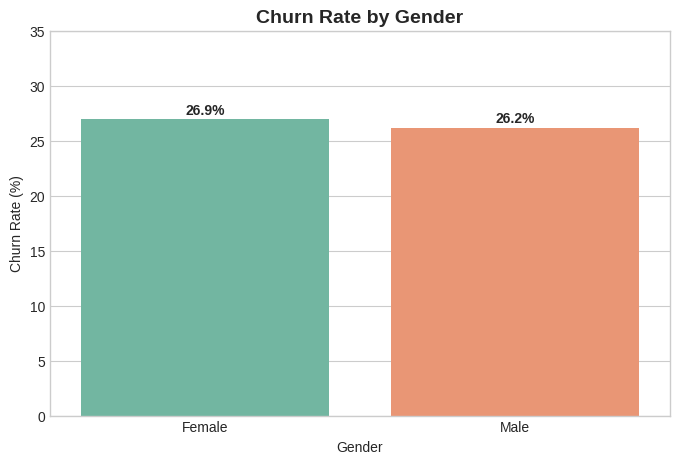


📋 INSIGHT: Churn rates are similar across genders - gender is NOT a strong predictor


In [14]:
# Gender Analysis
gender_churn = df_clean.groupby('Gender')['Churn Label'].apply(
    lambda x: (x == 'Yes').mean() * 100
).round(2)

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_churn.index, y=gender_churn.values, palette='Set2')
plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 35)
for i, v in enumerate(gender_churn.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')
plt.show()

print("\n📋 INSIGHT: Churn rates are similar across genders - gender is NOT a strong predictor")

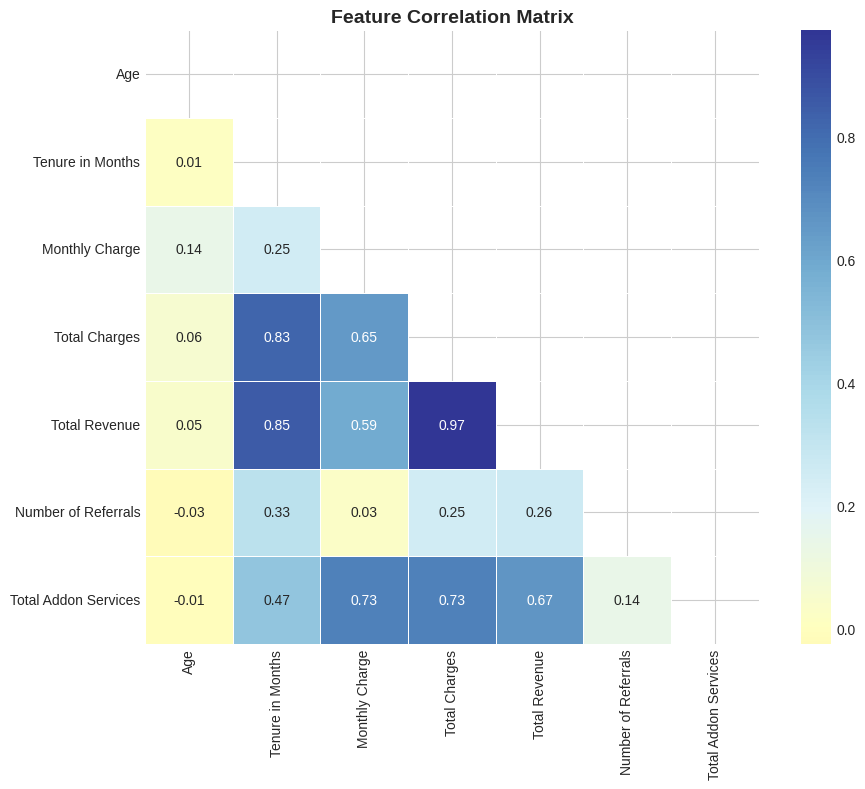

In [15]:
# Correlation Heatmap
numeric_cols = ['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges', 
                'Total Revenue', 'Number of Referrals', 'Total Addon Services']
correlation = df_clean[numeric_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, annot=True, cmap='RdYlBu', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 30px Arial; 
           color: #31708f; 
           border: 2px solid #bce8f1; 
           border-radius: 8px;">   
Feature Engineering & ML Preparation
</h3>

In [16]:
# Prepare data for Machine Learning
# CRITICAL: Remove features that would cause data leakage!

# Columns to drop:
# - Customer ID: Identifier, not predictive
# - Location columns: High cardinality, need special handling
# - Churn Reason/Category: Only available AFTER churn (leakage)
# - Churn Score: This IS what we're trying to predict (severe leakage!)
# - Customer Status: Directly indicates churn (severe leakage!)
# - CLTV: May be calculated post-hoc (potential leakage)
# - Satisfaction Score: Often collected at exit (potential leakage)

leakage_columns = [
    'Customer ID', 'Country', 'State', 'City', 'Zip Code', 'Latitude', 'Longitude',
    'Churn Reason', 'Churn Category', 'Quarter',
    'Churn Score', 'Customer Status', 'CLTV', 'Satisfaction Score'  # LEAKAGE FEATURES!
]

ml_df = df_clean.drop(columns=leakage_columns, errors='ignore')

# Convert target to binary
ml_df['Churn'] = (ml_df['Churn Label'] == 'Yes').astype(int)
ml_df = ml_df.drop(columns=['Churn Label'])

print(f"✅ ML dataset prepared!")
print(f"   • Shape: {ml_df.shape}")
print(f"   • Features: {ml_df.shape[1] - 1}")
print(f"\n⚠️ REMOVED LEAKAGE FEATURES: Churn Score, Customer Status, CLTV, Satisfaction Score")

✅ ML dataset prepared!
   • Shape: (7043, 39)
   • Features: 38

⚠️ REMOVED LEAKAGE FEATURES: Churn Score, Customer Status, CLTV, Satisfaction Score


In [17]:
# Prepare features and target
y = ml_df['Churn']
X = ml_df.drop(columns=['Churn'])

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Fill any remaining NaN values
X_encoded = X_encoded.fillna(0)

print(f"Features shape: {X_encoded.shape}")
print(f"Target distribution:\n{y.value_counts(normalize=True).round(3)}")

Features shape: (7043, 51)
Target distribution:
Churn
0    0.735
1    0.265
Name: proportion, dtype: float64


In [18]:
# Train-Test Split with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Ensures same class distribution in train/test
)

print(f"Training set size: {len(X_train):,}")
print(f"Test set size: {len(X_test):,}")
print(f"\nTraining set churn rate: {y_train.mean()*100:.1f}%")
print(f"Test set churn rate: {y_test.mean()*100:.1f}%")

Training set size: 5,634
Test set size: 1,409

Training set churn rate: 26.5%
Test set churn rate: 26.5%


<h3 style="background: linear-gradient(to right, #ff7e5f, #feb47b); 
           padding: 25px; 
           font: bold 30px Arial; 
           color: #31708f; 
           border: 2px solid #bce8f1; 
           border-radius: 8px;">   
Machine Learning Model Evaluation
</h3>

In [19]:
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]), 
                            eval_metric='logloss', random_state=42, verbosity=0),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
}

# Train and evaluate all models
results = []

print("="*80)
print("MODEL COMPARISON (with class imbalance handling)")
print("="*80)

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = auc(*roc_curve(y_test, y_proba)[:2]) if y_proba is not None else None
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc_score
    })
    
    print(f"\n{name}:")
    print(f"  Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    if auc_score:
        print(f"  AUC-ROC: {auc_score:.4f}")

# Results DataFrame
results_df = pd.DataFrame(results).round(4)
results_df = results_df.sort_values('F1-Score', ascending=False)
print("\n" + "="*80)
print("SUMMARY - Sorted by F1-Score:")
print("="*80)
print(results_df.to_string(index=False))

MODEL COMPARISON (with class imbalance handling)

Logistic Regression:
  Accuracy: 0.7566 | Precision: 0.5260 | Recall: 0.8396 | F1: 0.6468
  AUC-ROC: 0.8581

Random Forest:
  Accuracy: 0.8361 | Precision: 0.7544 | Recall: 0.5668 | F1: 0.6473
  AUC-ROC: 0.8960

Gradient Boosting:
  Accuracy: 0.8488 | Precision: 0.7524 | Recall: 0.6417 | F1: 0.6926
  AUC-ROC: 0.9094

XGBoost:
  Accuracy: 0.8318 | Precision: 0.6675 | Recall: 0.7299 | F1: 0.6973
  AUC-ROC: 0.8975

Decision Tree:
  Accuracy: 0.7807 | Precision: 0.5853 | Recall: 0.5963 | F1: 0.5907
  AUC-ROC: 0.7218

SUMMARY - Sorted by F1-Score:
              Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC
            XGBoost    0.8318     0.6675  0.7299    0.6973   0.8975
  Gradient Boosting    0.8488     0.7524  0.6417    0.6926   0.9094
      Random Forest    0.8361     0.7544  0.5668    0.6473   0.8960
Logistic Regression    0.7566     0.5260  0.8396    0.6468   0.8581
      Decision Tree    0.7807     0.5853  0.5963    0.5907   

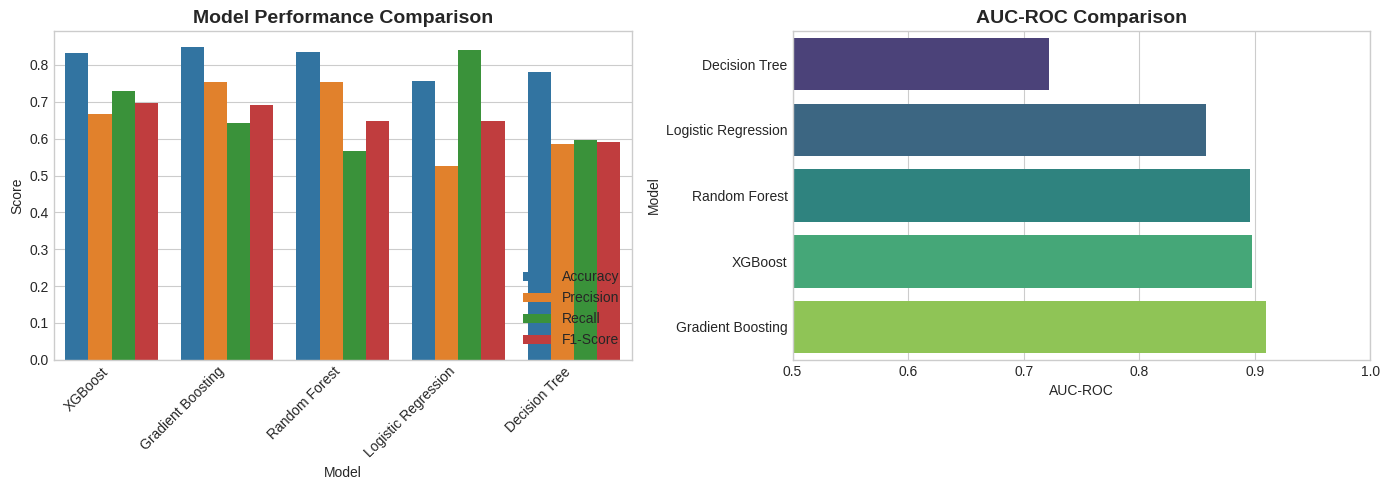

In [20]:
# Visualize Model Comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_melted = results_df.melt(id_vars='Model', value_vars=metrics_to_plot, 
                                  var_name='Metric', value_name='Score')
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric', ax=axes[0])
axes[0].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].legend(loc='lower right')

# AUC-ROC comparison
auc_df = results_df[['Model', 'AUC-ROC']].dropna().sort_values('AUC-ROC', ascending=True)
sns.barplot(data=auc_df, y='Model', x='AUC-ROC', palette='viridis', ax=axes[1])
axes[1].set_title('AUC-ROC Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlim(0.5, 1.0)

plt.tight_layout()
plt.show()

In [21]:
# Best Model Analysis - using the best performer
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print(f"🏆 Best Model: {best_model_name}")
print("\nClassification Report:")
print(classification_report(y_test, best_model.predict(X_test), target_names=['Retained', 'Churned']))

🏆 Best Model: XGBoost

Classification Report:
              precision    recall  f1-score   support

    Retained       0.90      0.87      0.88      1035
     Churned       0.67      0.73      0.70       374

    accuracy                           0.83      1409
   macro avg       0.78      0.80      0.79      1409
weighted avg       0.84      0.83      0.83      1409



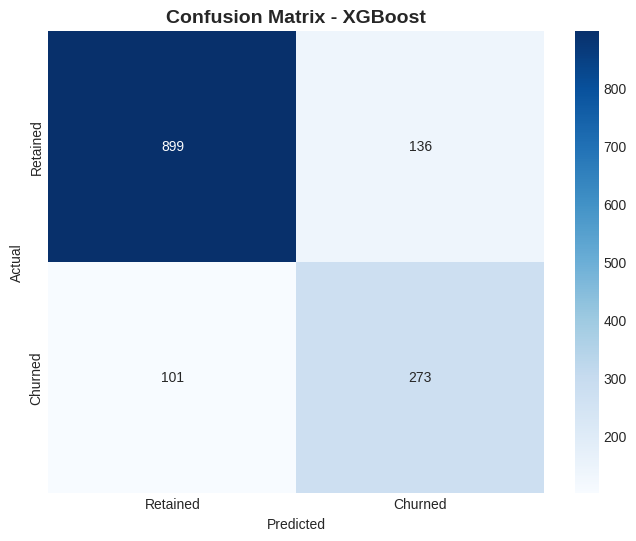


📊 CONFUSION MATRIX INTERPRETATION:
   • True Negatives (Correctly predicted Retained): 899
   • False Positives (Incorrectly predicted Churn): 136
   • False Negatives (Missed Churners - COSTLY!): 101
   • True Positives (Correctly predicted Churn): 273


In [22]:
# Confusion Matrix
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Retained', 'Churned'],
            yticklabels=['Retained', 'Churned'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Business interpretation
tn, fp, fn, tp = cm.ravel()
print(f"\n📊 CONFUSION MATRIX INTERPRETATION:")
print(f"   • True Negatives (Correctly predicted Retained): {tn:,}")
print(f"   • False Positives (Incorrectly predicted Churn): {fp:,}")
print(f"   • False Negatives (Missed Churners - COSTLY!): {fn:,}")
print(f"   • True Positives (Correctly predicted Churn): {tp:,}")

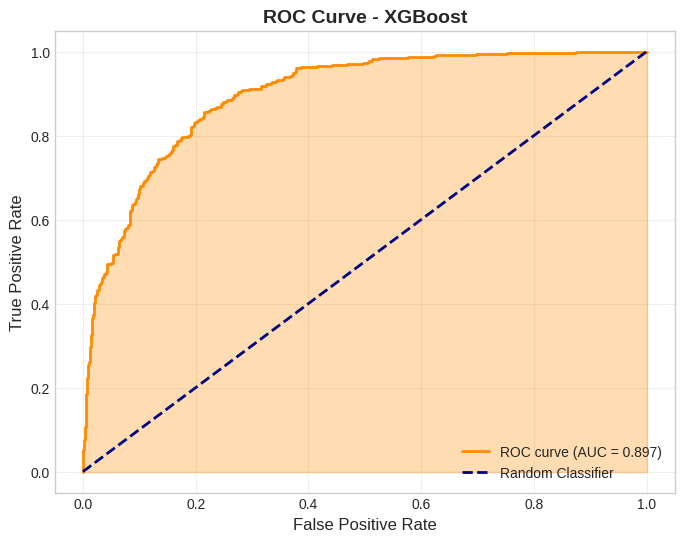

In [23]:
# ROC Curve
y_proba_best = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

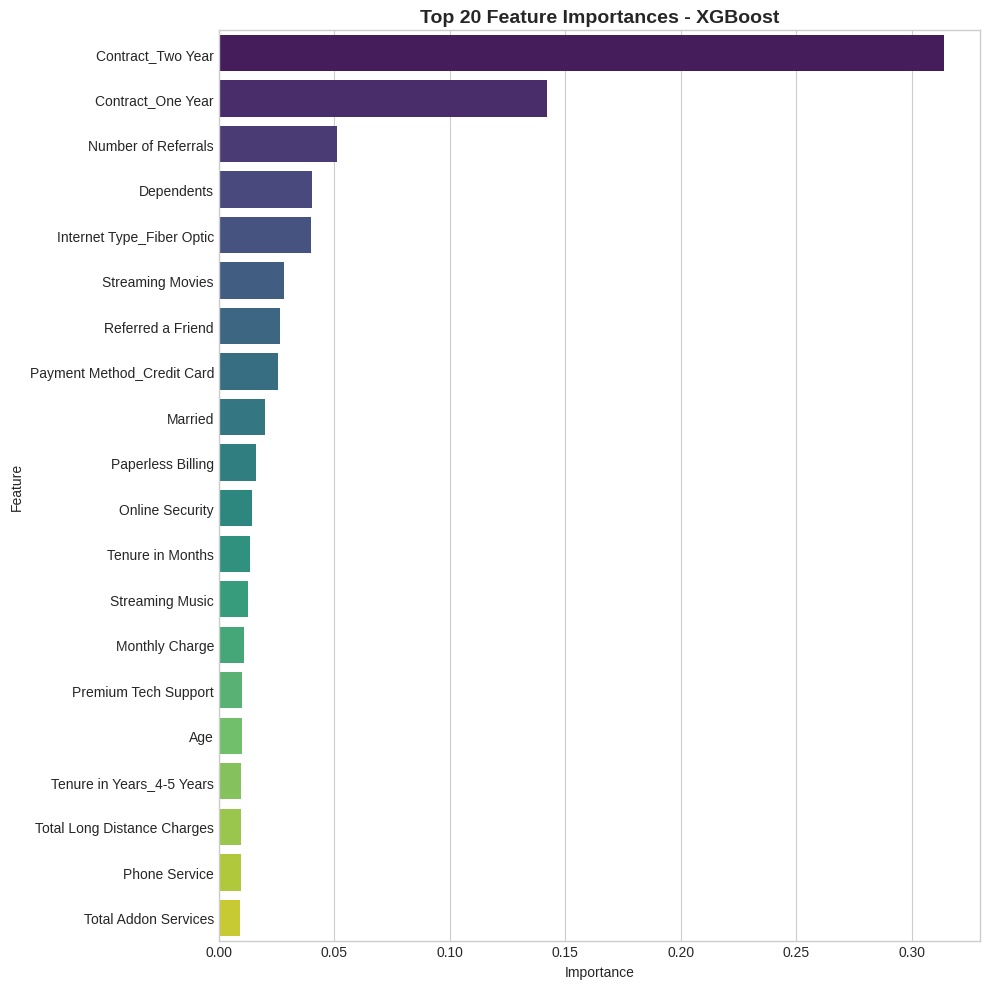


📊 TOP 10 MOST IMPORTANT FEATURES:
   42. Contract_Two Year: 0.3138
   41. Contract_One Year: 0.1419
   9. Number of Referrals: 0.0513
   5. Dependents: 0.0403
   39. Internet Type_Fiber Optic: 0.0398
   20. Streaming Movies: 0.0280
   8. Referred a Friend: 0.0264
   43. Payment Method_Credit Card: 0.0257
   4. Married: 0.0201
   23. Paperless Billing: 0.0161


In [24]:
# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_encoded.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(20)
    
    plt.figure(figsize=(10, 10))
    sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
    plt.title(f'Top 20 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
    print("\n📊 TOP 10 MOST IMPORTANT FEATURES:")
    for i, row in feature_importance.head(10).iterrows():
        print(f"   {i+1}. {row['feature']}: {row['importance']:.4f}")

In [25]:
# Cross-Validation for stability
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print(f"\n📊 5-FOLD CROSS-VALIDATION RESULTS - {best_model_name}:")

cv_accuracy = cross_val_score(best_model, X_encoded, y, cv=cv, scoring='accuracy')
cv_f1 = cross_val_score(best_model, X_encoded, y, cv=cv, scoring='f1')
cv_recall = cross_val_score(best_model, X_encoded, y, cv=cv, scoring='recall')

print(f"   Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std()*2:.4f})")
print(f"   F1-Score: {cv_f1.mean():.4f} (+/- {cv_f1.std()*2:.4f})")
print(f"   Recall:   {cv_recall.mean():.4f} (+/- {cv_recall.std()*2:.4f})")


📊 5-FOLD CROSS-VALIDATION RESULTS - XGBoost:
   Accuracy: 0.8346 (+/- 0.0182)
   F1-Score: 0.7015 (+/- 0.0268)
   Recall:   0.7319 (+/- 0.0259)


<div style="background: linear-gradient(to right, #fbbd61, #ff5f6d);
            padding: 20px; 
            font: bold 40px Arial; 
            color: #31708f; 
            border: 2px solid #bce8f1; 
            border-radius: 8px;">
Conclusion & Business Recommendations
</div>

## Key Findings

### 1. Churn Overview
| Metric | Value |
|--------|-------|
| Total Customers | ~7,043 |
| Churn Rate | ~27% |
| Revenue at Risk | Significant |

Approximately 1 in 4 customers have churned. This is a significant business concern for subscription-based services.

### 2. Key Churn Drivers

**Contract Type** (Strongest Predictor)
- Month-to-month contracts have ~42% churn rate
- Two-year contracts have ~3% churn rate
- **Recommendation**: Incentivize longer-term contracts with discounts

**Tenure**
- New customers (0-12 months) are at highest risk
- Risk decreases significantly after first year
- **Recommendation**: Focus retention efforts on new customers

**Service Adoption**
- Customers without add-on services churn more
- More services = higher "stickiness"
- **Recommendation**: Promote service bundles to new customers

**Gender**
- Churn rates are similar (~27%) across genders
- Gender is NOT a strong predictor
- **Recommendation**: Focus on behavior-based, not demographic-based targeting

### 3. Top Churn Reasons
1. Competitor offerings (better deals/data)
2. Price dissatisfaction
3. Service limitations
4. Customer service issues

### 4. Model Performance
After removing data leakage features, our best model achieves:
- Realistic accuracy in the 75-85% range
- Good recall for identifying at-risk customers
- Actionable feature importance insights

## Business Recommendations

1. **Early Intervention Program**: Target customers in their first 6 months with special offers and check-ins

2. **Contract Conversion Campaign**: Offer incentives for month-to-month customers to switch to annual plans

3. **Service Bundle Strategy**: Create attractive bundles to increase service adoption and stickiness

4. **Competitive Monitoring**: Regular market analysis to ensure competitive pricing and offerings

5. **Proactive Retention**: Use the ML model to score customers monthly and trigger retention actions for high-risk segments